In [3]:
#Importing Necessary Libraries
import numpy #used for numerical analysis
import tensorflow #open source used for both NL and DL for computation
from tensorflow.keras.datasets import mnist #mnist datoser
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from tensorflow.keras import layers# A Layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected
#Faltten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional Layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot encoding

In [4]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data() #splitting the mist data into train and test

In [6]:
print(x_train.shape) #shope is used for give the dimension values #60000-rows 28x28-pixels 
print (x_test.shape)
(68000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


(10000, 28, 28)

In [7]:
#Understanding the data
x_train[0] #printing the first image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]#printing Lable of first image


5

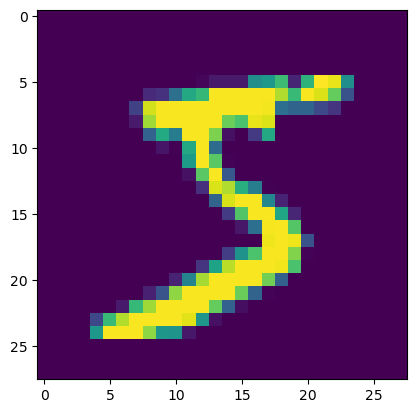

In [9]:
import matplotlib.pyplot as plt #used for data visualization 
plt.imshow(x_train[0]) #ploting the index=0 image


In [11]:
#Reshaping Dataset
#Reshaping to format which CNN expects (batch, height, width, channels) 
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') 
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [12]:
#One-Hot Encoding
#one hot encode
number_of_classes = 10 #storing the no. classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test= np_utils.to_categorical (y_test, number_of_classes)

In [13]:
y_train[0] #printing the new Label


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
#Creating the Model
#create model
model =Sequential()
#adding model Layer
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
#model.add(Conv20(32, (3, 3), activation="relu"))
#flotten the dimension of the image
model.add(Flatten())
#output Layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

In [15]:
#Compiling the model
# Compile mode
model.compile(loss="categorical_crossentropy", optimizer =
              "Adam", metrics=['accuracy'])

In [16]:
# Fit the model
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 153s 78ms/step - loss: 0.2297 - accuracy: 0.9496 - val_loss: 0.0890 - val_accuracy: 0.9713
Epoch 2/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0853 - val_accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0941 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.1209 - val_accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.1211 - val_accuracy: 0.9749


In [18]:
#Observing the metrics
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=8)
print("Metrics (Test loss & Test Accuracy): ") 
print(metrics)


Metrics (Test loss & Test Accuracy): 
[0.12106359004974365, 0.9749000072479248]


In [20]:
#Predicting the output
prediction= model.predict(x_test[:4])
print (prediction)


1/1 [==============================] - 4s 4s/step
[[7.5828016e-15 2.5196708e-25 2.1200779e-16 7.5312082e-13 6.4813581e-24
  7.9925251e-22 3.5580354e-27 1.0000000e+00 8.6040792e-16 4.1065577e-17]
 [6.2123124e-17 2.7986768e-14 1.0000000e+00 2.7760481e-19 1.0891594e-17
  1.3349902e-25 5.1022618e-16 1.5569657e-20 7.5777659e-16 3.9196762e-22]
 [1.9411820e-12 9.9999404e-01 5.1063512e-06 6.8294258e-13 3.1355082e-08
  3.2682621e-09 1.1854252e-10 9.9163522e-08 6.9398669e-07 9.8699549e-15]
 [9.9999988e-01 3.5072842e-20 1.1498146e-11 9.4269759e-16 2.7598231e-16
  7.6828446e-15 6.6758218e-12 5.1336656e-12 1.0471004e-10 8.2694463e-08]]


In [22]:
import numpy as np
print (np.argmax(prediction, axis=1)) #printing our labels from first 4 images
print (y_test[:4]) #printing the actual labels


[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
#Observing the metrics
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=8) 
print("Metrics (Test loss & Test Accuracy): ")
print(metrics)


Metrics (Test loss & Test Accuracy): 
[0.12106359004974365, 0.9749000072479248]


In [26]:
#Predicting the output
prediction= model.predict(x_test[:4]) 
print (prediction)


1/1 [==============================] - 0s 23ms/step
[[7.5828016e-15 2.5196708e-25 2.1200779e-16 7.5312082e-13 6.4813581e-24
  7.9925251e-22 3.5580354e-27 1.0000000e+00 8.6040792e-16 4.1065577e-17]
 [6.2123124e-17 2.7986768e-14 1.0000000e+00 2.7760481e-19 1.0891594e-17
  1.3349902e-25 5.1022618e-16 1.5569657e-20 7.5777659e-16 3.9196762e-22]
 [1.9411820e-12 9.9999404e-01 5.1063512e-06 6.8294258e-13 3.1355082e-08
  3.2682621e-09 1.1854252e-10 9.9163522e-08 6.9398669e-07 9.8699549e-15]
 [9.9999988e-01 3.5072842e-20 1.1498146e-11 9.4269759e-16 2.7598231e-16
  7.6828446e-15 6.6758218e-12 5.1336656e-12 1.0471004e-10 8.2694463e-08]]


In [27]:
import numpy as np
print (np.argmax(prediction, axis=1)) #printing our labels from first 4 images
print (y_test[:4]) #printing the actual labels


[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
#Saving the model
# Save the model
model.save('models/mnistCNN.h5')

In [37]:
#Taking images as input and checking results
#Importing the Keras Libraries and packages
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\karthik\models\mnistCNN.h5')
from PIL import Image # used for manipulating image uploaded by the user.
import numpy as np #used for numerical analysis
for index in range(4):
    img = Image.open(r"C:\Users\karthik\PROJECT IBM\models\archive\mnist_png\mnist_png\testing\0\3.png") #convert image to monochrome

    img = img.resize((28,28))# resizing of input image
    im2arr =  np.array(img) #converting to image
    im2arr = im2arr.reshape(1,28,28,1) #reshaping according to our requirement
    #Predicting the Test set results
    y_pred =  model.predict(im2arr) #predicting the results
    print(y_pred)


1/1 [==============================] - 0s 77ms/step
[[9.9999988e-01 3.5072842e-20 1.1498103e-11 9.4270479e-16 2.7598337e-16
  7.6827862e-15 6.6757710e-12 5.1336461e-12 1.0471024e-10 8.2694307e-08]]
1/1 [==============================] - 0s 20ms/step
[[9.9999988e-01 3.5072842e-20 1.1498103e-11 9.4270479e-16 2.7598337e-16
  7.6827862e-15 6.6757710e-12 5.1336461e-12 1.0471024e-10 8.2694307e-08]]
1/1 [==============================] - 0s 20ms/step
[[9.9999988e-01 3.5072842e-20 1.1498103e-11 9.4270479e-16 2.7598337e-16
  7.6827862e-15 6.6757710e-12 5.1336461e-12 1.0471024e-10 8.2694307e-08]]
1/1 [==============================] - 0s 27ms/step
[[9.9999988e-01 3.5072842e-20 1.1498103e-11 9.4270479e-16 2.7598337e-16
  7.6827862e-15 6.6757710e-12 5.1336461e-12 1.0471024e-10 8.2694307e-08]]
